In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Normal Equation Method

$$h(x) = \theta_0 + \theta_1 x$$

To find the best parameters analytically, we use 
  
$$\theta = (X^T X)^{-1} X^T y$$

In [27]:
class LinearRegressionMyClass:
    def __init__(self, X, y):
        self.X = np.hstack((np.ones(len(X)).reshape(-1,1), X))
        self.y = y
        self.m = len(X)
        
    # Class Methods
    def fit(self):
        
        # Normal equation
        self.intercept_, self.coef_ = np.linalg.inv(self.X.T @ self.X) @ self.X.T @ self.y
        
        # Compute for the linear regression model's score
        predicted_y = self.intercept_ + self.coef_*self.X.T[1]
        
        SS_res = 0
        for i in range(self.m):
            SS_res += (self.y[i] - predicted_y[i])**2
            
        SS_tot = 0
        for i in range(self.m):
            SS_tot += (self.y[i] - self.y.mean())**2
        
        self.R2 = 1 - (SS_res/SS_tot)
    
    def predict(self, x_test):      
        return self.intercept_ + self.coef_*x_test

# Test the function

### Make regression data

In [23]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=50, n_features=1, noise=15)

### Fit the data

In [24]:
regtest = LinearRegressionMyClass(X,y)
regtest.fit()
regtest.R2

0.9689960235011241

### Plot the results

<IPython.core.display.Javascript object>


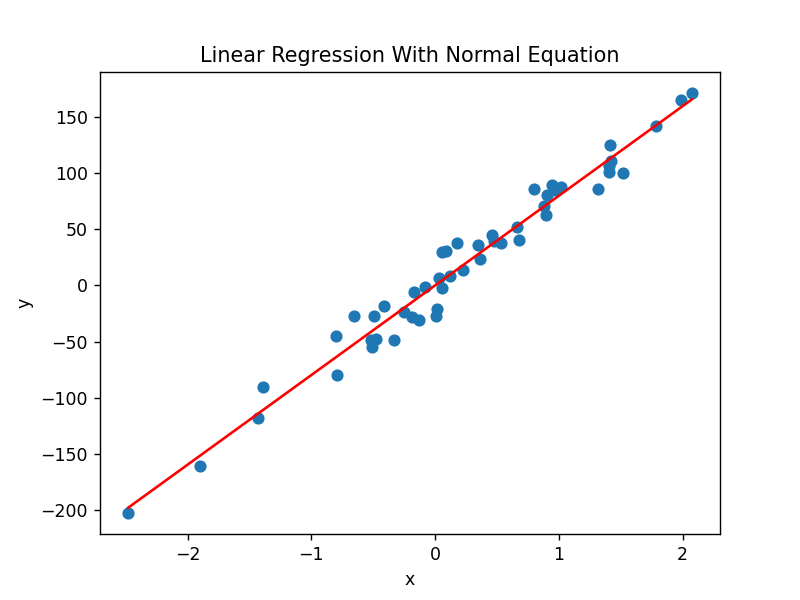

Text(0.5, 1.0, 'Linear Regression With Normal Equation')

In [25]:
plt.figure()
plt.scatter(X,y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, regtest.predict(xs_line), 'red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression With Normal Equation")

# Scikit-learn

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X.reshape((-1, 1)), y)
print(reg.intercept_, reg.coef_[0], reg.score(X.reshape((-1, 1)), y))

0.001404535061652723 79.68897859770317 0.9689960235011241
